In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('/content/Dataset .csv')

In [3]:
# Drop columns by their positions
columns_to_drop_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Adjust the indices as needed
data.drop(data.columns[columns_to_drop_indices], axis=1, inplace=True)

In [4]:
# Display cleaned dataset
print("Modified Dataset:")
print(data.head())

Modified Dataset:
           Currency Has Table booking Has Online delivery Is delivering now  \
0  Botswana Pula(P)               Yes                  No                No   
1  Botswana Pula(P)               Yes                  No                No   
2  Botswana Pula(P)               Yes                  No                No   
3  Botswana Pula(P)                No                  No                No   
4  Botswana Pula(P)               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    

In [5]:
# Check dataset shape
print("\nDataset Shape:", data.shape)


Dataset Shape: (9551, 10)


In [6]:
# Display dataset information
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Currency              9551 non-null   object 
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Switch to order menu  9551 non-null   object 
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating color          9551 non-null   object 
 8   Rating text           9551 non-null   object 
 9   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 746.3+ KB
None


In [7]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Price range  Aggregate rating         Votes
count  9551.000000       9551.000000   9551.000000
mean      1.804837          2.666370    156.909748
std       0.905609          1.516378    430.169145
min       1.000000          0.000000      0.000000
25%       1.000000          2.500000      5.000000
50%       2.000000          3.200000     31.000000
75%       2.000000          3.700000    131.000000
max       4.000000          4.900000  10934.000000


In [8]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
# Check for duplicated rows
print("\nDuplicated Rows:", data.duplicated().sum())


Duplicated Rows: 3993


In [10]:
# Remove rows with missing values
data.dropna(inplace=True)

In [11]:
# Visualize price range distribution
import matplotlib.pyplot as plt
import seaborn as sb

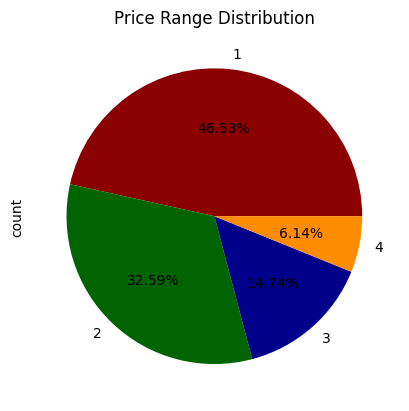

In [12]:
# Visualize price range distribution
data['Price range'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['darkred', 'darkgreen', 'darkblue', 'darkorange'])
plt.title('Price Range Distribution')
plt.show()

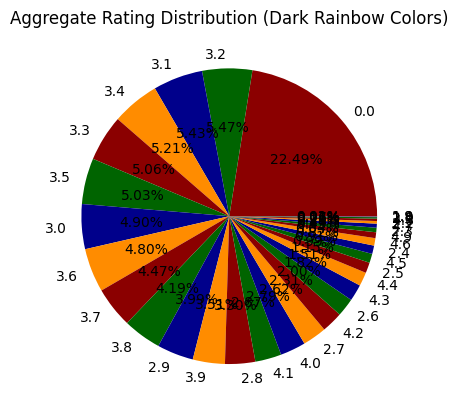

In [13]:
import matplotlib.pyplot as plt

# Get value counts of 'Aggregate rating'
rating_counts = data['Aggregate rating'].value_counts()

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(rating_counts, labels=rating_counts.index, autopct='%1.2f%%', colors=['darkred', 'darkgreen', 'darkblue', 'darkorange'])
ax.set_title('Aggregate Rating Distribution (Dark Rainbow Colors)')
plt.show()


<ipython-input-14-fb4a82c03a56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Price range'], color='darkgreen', kde_kws={'color': 'darkblue'})


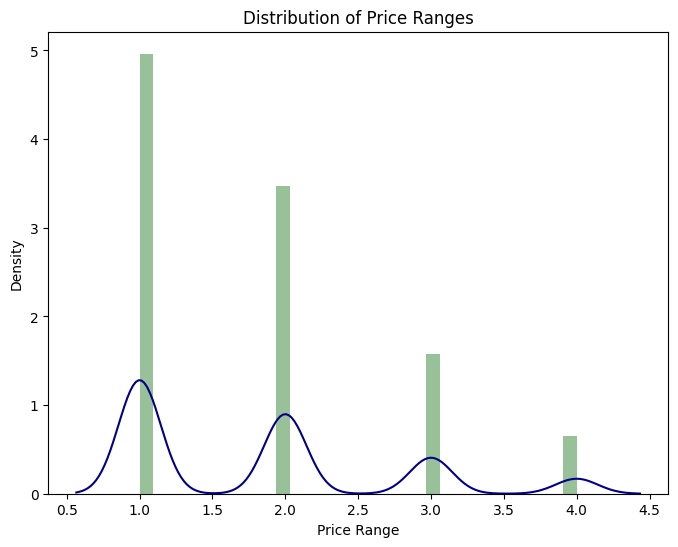

In [14]:
# Create the distribution plot for Price Range
plt.figure(figsize=(8, 6))
sb.distplot(data['Price range'], color='darkgreen', kde_kws={'color': 'darkblue'})
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Density')
plt.show()

<ipython-input-15-9d1361755a55>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Aggregate rating'], color='darkblue', kde_kws={'color': 'darkred'}, label='Rating')
<ipython-input-15-9d1361755a55>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Price range'], color='darkgreen', kde_kw

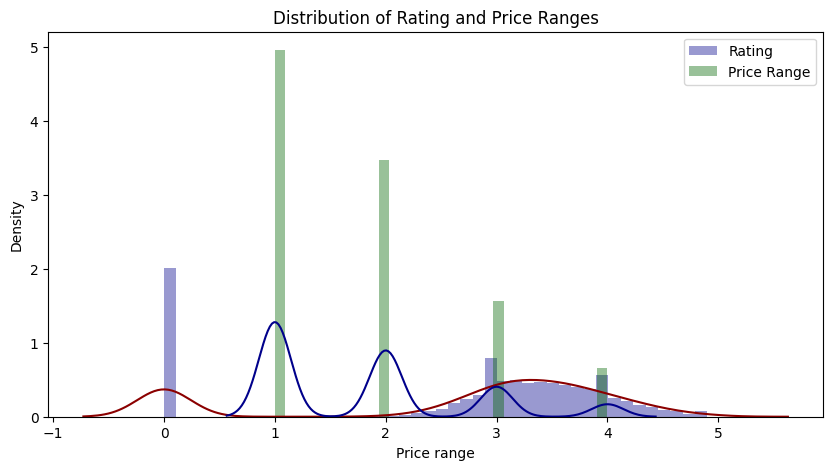

In [15]:
# Plot distributions of Rating and Price Range
plt.figure(figsize=(10, 5))
sb.distplot(data['Aggregate rating'], color='darkblue', kde_kws={'color': 'darkred'}, label='Rating')
sb.distplot(data['Price range'], color='darkgreen', kde_kws={'color': 'darkblue'}, label='Price Range')
plt.title('Distribution of Rating and Price Ranges')
plt.legend()
plt.show()

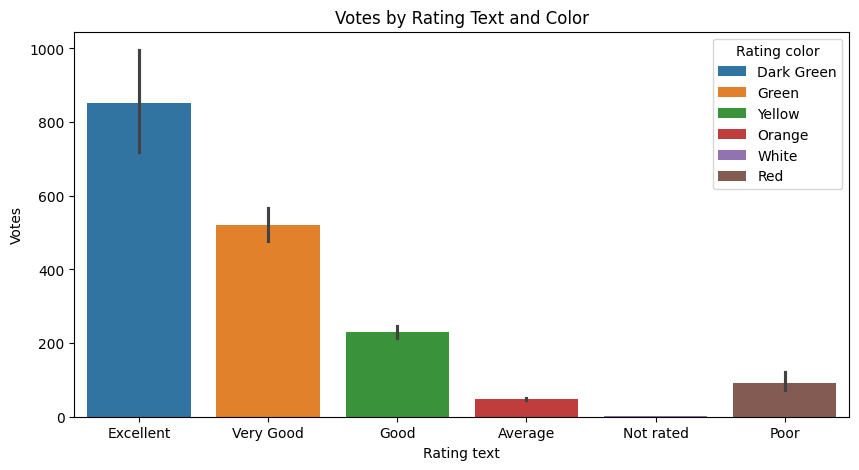

In [16]:
# Bar plot of votes by rating and color
plt.figure(figsize=(10, 5))
sb.barplot(x=data['Rating text'], y=data['Votes'], hue=data['Rating color'])
plt.title('Votes by Rating Text and Color')
plt.xlabel('Rating text')
plt.ylabel('Votes')
plt.show()

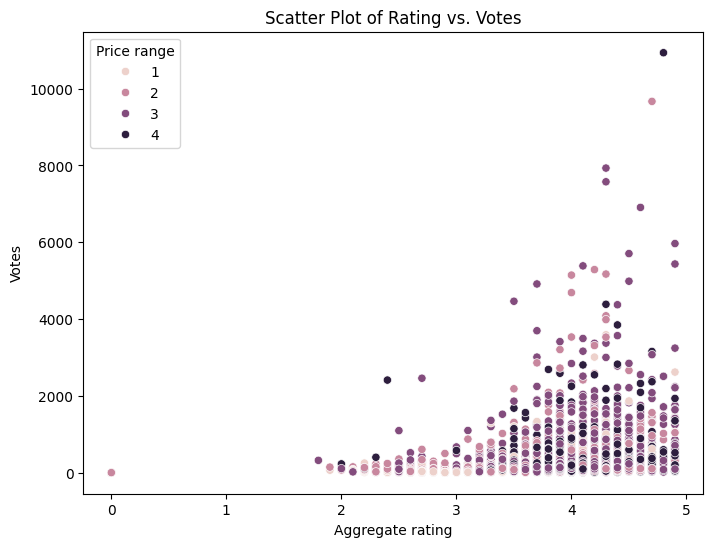

In [17]:
# Scatter plot of Rating vs. Votes
plt.figure(figsize=(8, 6))
sb.scatterplot(x=data["Aggregate rating"], y=data["Votes"], hue=data["Price range"])
plt.title('Scatter Plot of Rating vs. Votes')
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.show()

In [18]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

In [19]:
# Regression analysis

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()
data['Has Table booking'] = label_encoder.fit_transform(data['Has Table booking'])
data['Has Online delivery'] = label_encoder.fit_transform(data['Has Online delivery'])
data['Is delivering now'] = label_encoder.fit_transform(data['Is delivering now'])
data['Switch to order menu'] = label_encoder.fit_transform(data['Switch to order menu'])
data['Rating color'] = label_encoder.fit_transform(data['Rating color'])
data['Rating text'] = label_encoder.fit_transform(data['Rating text'])

In [21]:
# Display encoded dataset
print("\nEncoded Dataset:")
print(data.head())



Encoded Dataset:
           Currency  Has Table booking  Has Online delivery  \
0  Botswana Pula(P)                  1                    0   
1  Botswana Pula(P)                  1                    0   
2  Botswana Pula(P)                  1                    0   
3  Botswana Pula(P)                  0                    0   
4  Botswana Pula(P)                  1                    0   

   Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                  0                     0            3               4.8   
1                  0                     0            3               4.5   
2                  0                     0            4               4.4   
3                  0                     0            4               4.9   
4                  0                     0            4               4.8   

   Rating color  Rating text  Votes  
0             0            1    314  
1             0            1    591  
2             1           

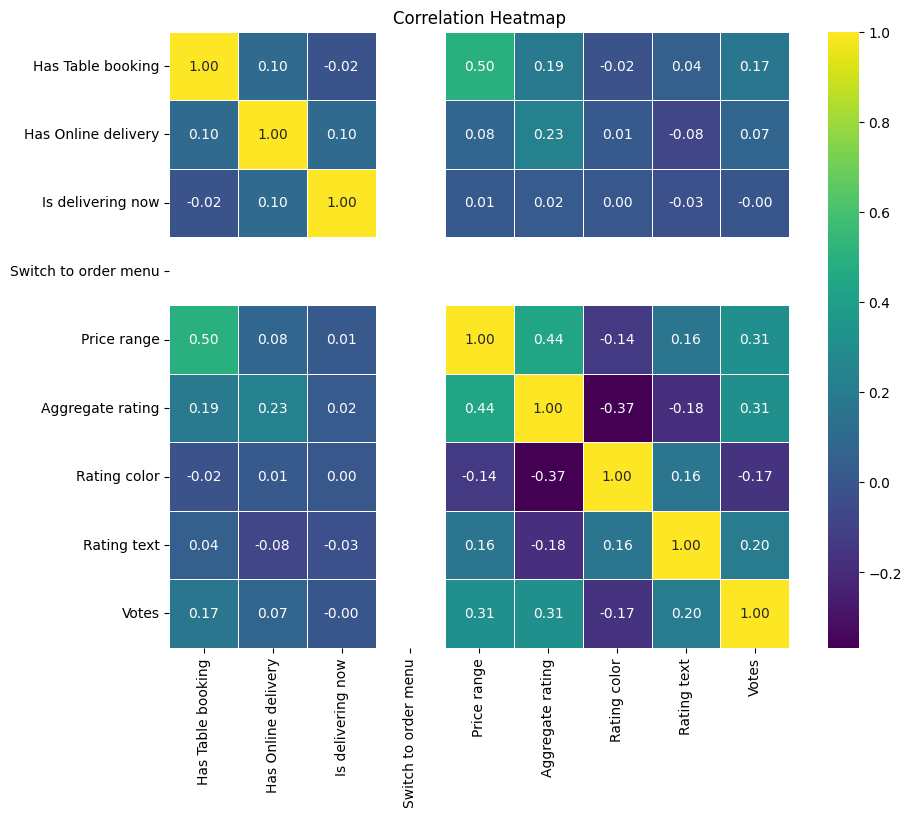

In [22]:
# Remove non-numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [23]:

# Regression analysis

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
x = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=353)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        x_train[col] = label_encoder.fit_transform(x_train[col])
        x_test[col] = label_encoder.transform(x_test[col])

# Now, fit the linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1.36


In [28]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")

R-squared (R2) Error: 0.45


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'x' contains your input features and 'y' contains the target variable
# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)

# Train and evaluate decision tree model using the encoded features
train_and_evaluate_decision_tree(x_encoded, y)


R-squared score: 0.9824218793469013


In [31]:

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor


DTree = DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(x_train, y_train)
y_predict = DTree.predict(x_test)

In [32]:
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.05


In [33]:
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2) Error: {r2:.2f}")

R-squared (R2) Error: 0.98


In [36]:
def get_conclusion():
    return "Conclusion: Decision Tree Regressor model is performing exceptionally well on the test data."

# Example usage:
conclusion = get_conclusion()
print(conclusion)

Conclusion: Decision Tree Regressor model is performing exceptionally well on the test data.
